In [ ]:
%matplotlib inline


# PCA example with Iris Data-set


Principal Component Analysis applied to the Iris dataset.

See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more
information on this dataset.


In [6]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified by: Ioannis Konstantinidis
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X_raw = iris.data
y_raw = iris.target

Automatically created module for IPython interactive environment


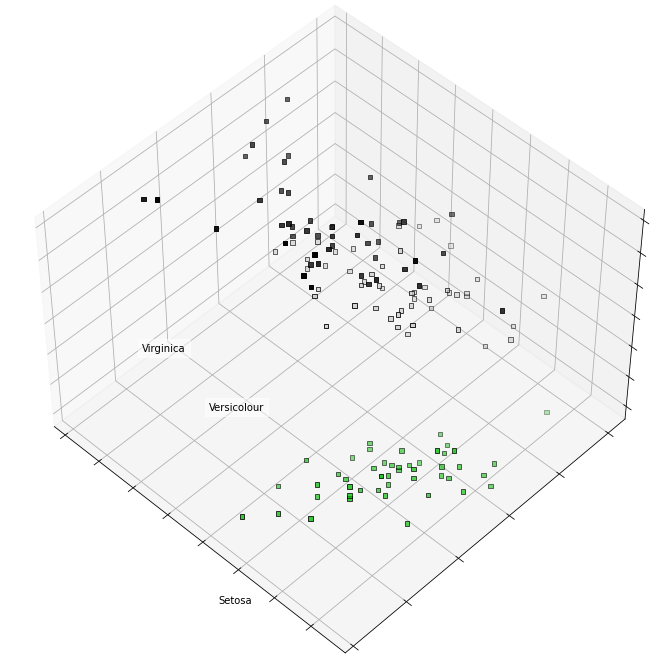

In [2]:
# let's plot the raw data in 3D

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_raw[y_raw == label, 0].mean(),
              X_raw[y_raw == label, 1].mean() + 1.5,
              X_raw[y_raw == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y_raw = np.choose(y_raw, [1, 2, 0]).astype(np.float)
ax.scatter(X_raw[:, 0], X_raw[:, 1], X_raw[:, 2], marker='s', c=y_raw, cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

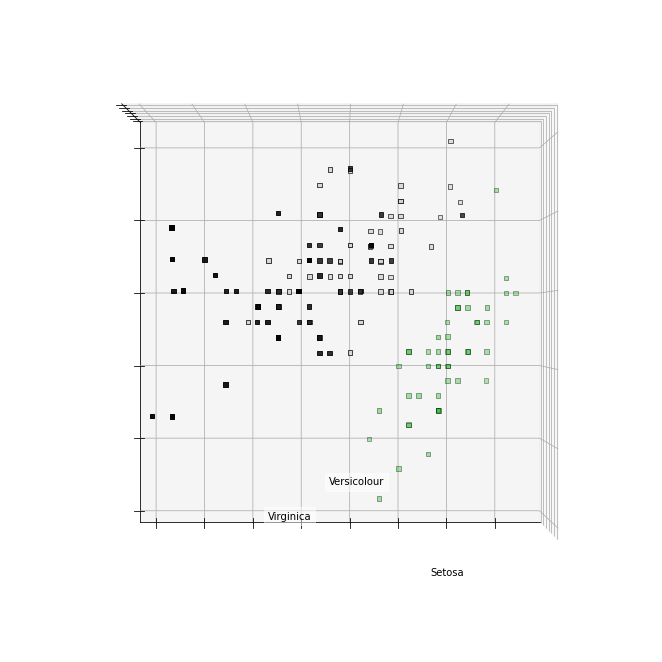

In [3]:
# we can see that they Virginica and Versicolour classes appear mixed and would be hard to separate

# let's look at the data from above (ignoring the third variable)

iris = datasets.load_iris()
X_raw = iris.data
y_raw = iris.target

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=90, azim=90)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_raw[y_raw == label, 0].mean(),
              X_raw[y_raw == label, 1].mean() + 1.5,
              X_raw[y_raw == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y_raw = np.choose(y_raw, [1, 2, 0]).astype(np.float)
ax.scatter(X_raw[:, 0], X_raw[:, 1], X_raw[:, 2], marker='s', c=y_raw, cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

explained variance ratio: [0.92461872 0.05306648 0.01710261]


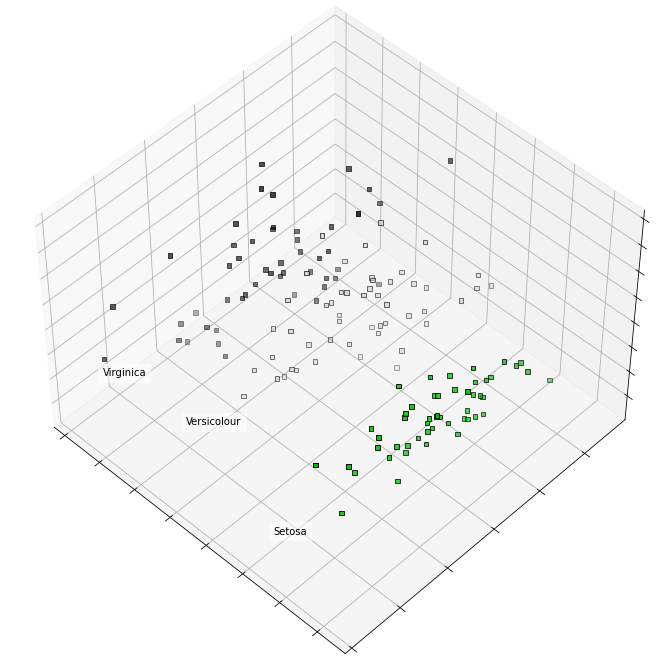

In [4]:
# let's use PCA to tranform the data and map in a new feature space

# load the data
iris = datasets.load_iris()
X_raw = iris.data
y = iris.target

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# use PCA to tranform the data 
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_raw)
X = pca.transform(X_raw)

# Percentage of variance explained for each components
print('explained variance ratio: %s' % str(pca.explained_variance_ratio_))

# map the data in the new feature space
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='s', c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

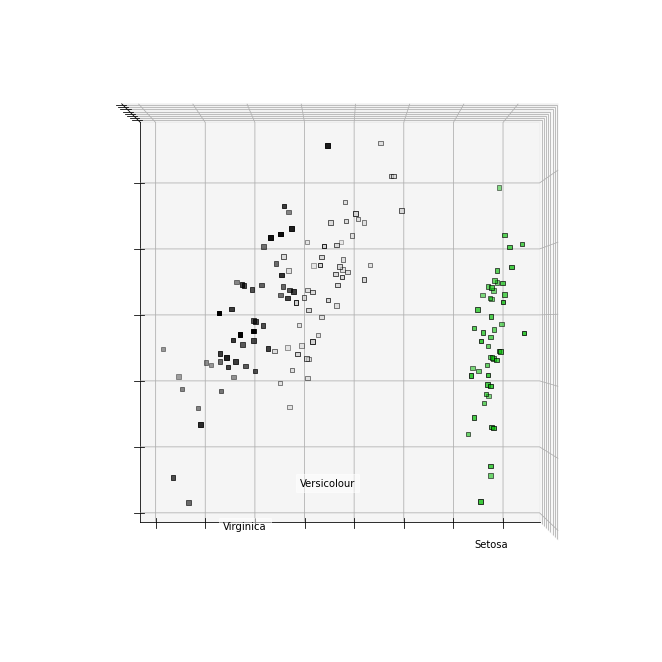

In [5]:
# the separation is clearer now using this new feature space

# in fact, let's look at the data from above (ignoring the third principal component)

# load the data
iris = datasets.load_iris()
X_raw = iris.data
y = iris.target

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=90, azim=90)

# use PCA to tranform the data 
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_raw)
X = pca.transform(X_raw)

# map the data in the new feature space
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='s', c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()